In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

# parameters
learning_rate = 0.001
training_epoches = 15
batch_size = 100

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
X = tf.placeholder(tf.float32,[None, 784])
Y = tf.placeholder(tf.float32,[None, 10])

W1 = tf.Variable(tf.random_normal([784,256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([256,256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,W2) + b2)

W3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2,W3) + b3

In [4]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=hypothesis,labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epoches):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs,Y: batch_ys}
        c, _ = sess.run([cost, optimizer],feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:','%04d'%(epoch+1),'cost = ','{:.09}'.format(avg_cost)) ## error{}
print('Learning finished!')       

Epoch: 0001 cost =  184.087123
Epoch: 0002 cost =  43.8269127
Epoch: 0003 cost =  27.3890535
Epoch: 0004 cost =  18.8421832
Epoch: 0005 cost =  13.8706492
Epoch: 0006 cost =  10.3013691
Epoch: 0007 cost =  7.81531142
Epoch: 0008 cost =  5.71691044
Epoch: 0009 cost =  4.35253803
Epoch: 0010 cost =  3.28495284
Epoch: 0011 cost =  2.4136374
Epoch: 0012 cost =  1.82907857
Epoch: 0013 cost =  1.38899347
Epoch: 0014 cost =  1.12735805
Epoch: 0015 cost =  0.863518323
Learning finished!


### test model and check accuracy

In [7]:
correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
# Returns the index with the largest value across axes of a tensor.
# for we use 'softmax_cross_entropy_with_logits',
# the prediction are presented as the paobability
# by the argmax function we will get the index of largest probability of prediction
# but why we need use tf.arg_max(Y,1)?
accracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

print('Accuracy:',sess.run(accracy,feed_dict={X: mnist.test.images, 
                                             Y: mnist.test.labels}))


Accuracy: 0.947


### get one picture, predict then draw a picture

In [8]:
r = random.randint(0,mnist.test.num_examples - 1)
mnist_test = mnist.test
label = mnist_test.labels[r:r+1]
image = mnist_test.images[r:r+1]
print("Label:", sess.run(tf.argmax(label,1)))
print("Prediction:",sess.run(
      tf.argmax(hypothesis,1),feed_dict={X:image}))

Label: [2]
Prediction: [2]


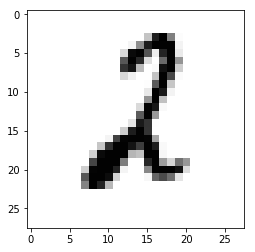

In [9]:
plt.imshow(image.reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()